In [1]:
import numpy as np
import drawSvg as draw
import math as m

C:\Users\mmoud\Anaconda3\lib\site-packages\drawSvg\raster.py:11: RuntimeWarning: CairoSVG will need to be installed to rasterize images: Install with `pip3 install cairosvg`
  warnings.warn(msg, RuntimeWarning)


In [9]:
## Global Variables
width = 400
height = 400
num_balls = 10
rad = 10
x =  np.random.uniform(-50,50,num_balls)
y =  np.random.uniform(-5,5,num_balls)
v_x = np.random.uniform(-5,5,num_balls)
v_y = np.random.uniform(-5,5,num_balls)
timestep =1

In [11]:
def update_position(i): # updates position of ball i
    # Boundary conditions to ensure ball bounces back into space
    # look at four extreme corners((w/2,h/2),(-w/2,h/2),()) to ensure ball does not leave box
    if x[i] >= (width/2)-(2*rad) or y[i] >= (height/2)-(2*rad): 
        # update velocity and position of ball i
        v_x[i] = - v_x[i]
        v_y[i] = - v_y[i]
        x[i] = x[i] + timestep * v_x[i]
        y[i] = y[i] + timestep * v_y[i]
    
    elif x[i] <= -(width/2)+(2*rad)  or y[i] <= -(height/2)+(2*rad): 
        v_x[i] = - v_x[i]
        v_y[i] = - v_y[i]
        x[i] = x[i] + timestep * v_x[i]
        y[i] = y[i] + timestep * v_y[i]
    else: 
        #v_x[i] = - v_x[i]
        #v_y[i] = - v_y[i]
        x[i] = x[i] + timestep * v_x[i]
        y[i] = y[i] + timestep * v_y[i]
        
    for j in range(num_balls):
        # Use distance between the centers of i and j are less than 1.5*rad to define collision
        if m.sqrt(((x[i]-x[j])**2) +((y[i]-y[j])**2)) <= 1.5*rad and i!=j: ##collision criteria
            # update velocity and position of ball i
            v_x[i] = - v_x[i]
            v_y[i] = - v_y[i]
            x[i] = x[i] + timestep * v_x[i]
            y[i] = y[i] + timestep * v_y[i] 
            # update velocity and position of ball j
            v_x[j] = - v_x[j]
            v_y[j] = - v_y[j]
            x[j] = x[j] + timestep * v_x[j]
            y[j] = y[j] + timestep * v_y[j] 
        
    
    return 



In [3]:
def draw_ball(i,D): # function draws ball for specific index and on canvas D
    #D = draw.Drawing(width, height, origin='center' ) 
    D.append(draw.Circle(x[i], y[i], rad,
            fill='green')) 
    return 

In [4]:
def draw_frame(): 
    D = draw.Drawing(width, height, origin='center' ) #draw canvas
    D.append(draw.Rectangle(-width/2,-height/2,width,height, fill='black')) #creates black rectangle of appropriate dimensions
    for i in range(num_balls): #loop through for each ball to update its position and draw it
        update_position(i)
        draw_ball(i,D)
    return D
        
    

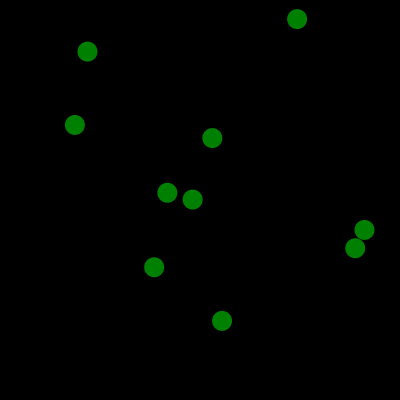

KeyboardInterrupt: 

In [13]:
a = 0 # counter variable to stop animation loop. not necessary
with draw.animate_jupyter(draw_frame, delay=0.05) as anim: #animation setup
    while( a <3000 ): 
        anim.draw_frame()
        a+=1